<a href="https://www.kaggle.com/code/vtrackstar/ncaa-2024-400m-top-500-analysis?scriptVersionId=196983459" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Data Pulled from TFRRS
men = pd.read_csv('/kaggle/input/ncaa-400m-top-500-2024/ncaa400m2024top500 - men.csv', skiprows=2, header=0)
women = pd.read_csv('/kaggle/input/ncaa-400m-top-500-2024/ncaa400m2024top500 - women.csv', skiprows=2, header=0)

print(men.head())
print(men.describe())

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ncaa-400m-top-500-2024/ncaa400m2024top500 - men.csv
/kaggle/input/ncaa-400m-top-500-2024/ncaa400m2024top500 - women.csv
   Unnamed: 0                        Athlete  Year           Team     Time  \
0           1  Morales Williams, Christopher  SO-2        Georgia    44.05   
1           2                  Ogazi, Samuel  FR-1        Alabama    44.58   
2           3             Lincoln IV, Judson  SO-2  Virginia Tech     44.6   
3           4           Blockburger, Johnnie  SR-4            USC  44.62 @   
4           5                  McRae, Khaleb  SR-4        Alabama    44.68   

                                      Meet     Meet Date  Time (clean)  
0  SEC Outdoor Track & Field Championships   May 9, 2024         44.05  
1  SEC Outdoor Track & Field Championships   May 9, 2024         44.58  
2  ACC Outdoor Track & Field Championships   May 9, 2024         44.60  
3     PAC-12 Track and Field Championships  May 10, 2024         44.62  
4  SEC Outdoor Track & Field Cha

In [2]:
print(women.head())
print(women.describe())

   Unnamed: 0            Athlete  Year      Team   Time  \
0           1    Pryce, Nickisha  SR-4  Arkansas  49.32   
1           2      Brown, Kaylyn  FR-1  Arkansas  49.47   
2           3      Anning, Amber  SR-4  Arkansas  49.51   
3           4    Butler, Aaliyah  SO-2   Georgia  49.79   
4           5  Onojuvwevwo, Ella  SO-2       LSU  50.57   

                                      Meet    Meet Date  Time (clean)  
0  SEC Outdoor Track & Field Championships  May 9, 2024         49.32  
1  SEC Outdoor Track & Field Championships  May 9, 2024         49.47  
2  SEC Outdoor Track & Field Championships  May 9, 2024         49.51  
3  SEC Outdoor Track & Field Championships  May 9, 2024         49.79  
4  SEC Outdoor Track & Field Championships  May 9, 2024         50.57  
       Unnamed: 0  Time (clean)
count   500.00000     500.00000
mean    250.20200      54.67856
std     144.58381       1.42338
min       1.00000      49.32000
25%     125.00000      53.86000
50%     250.00000    

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


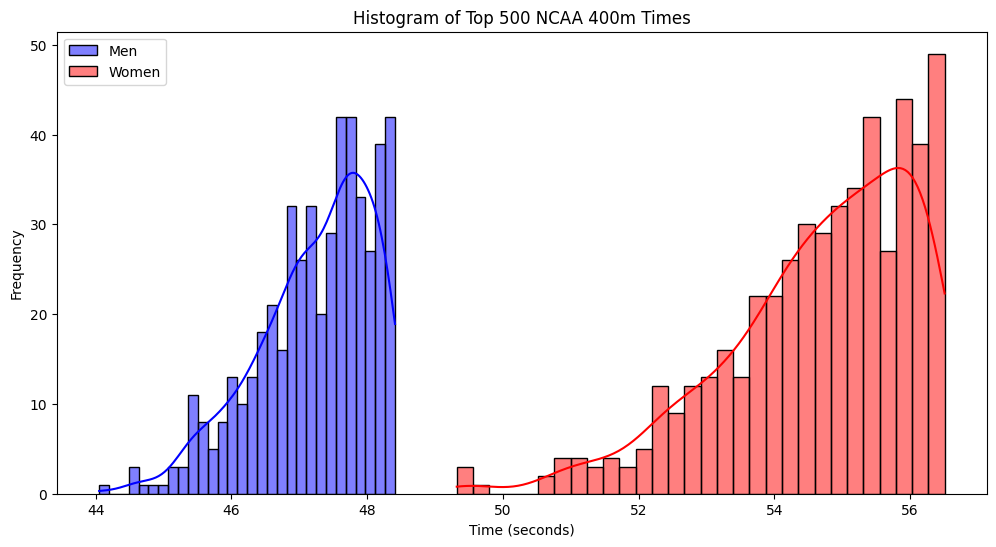

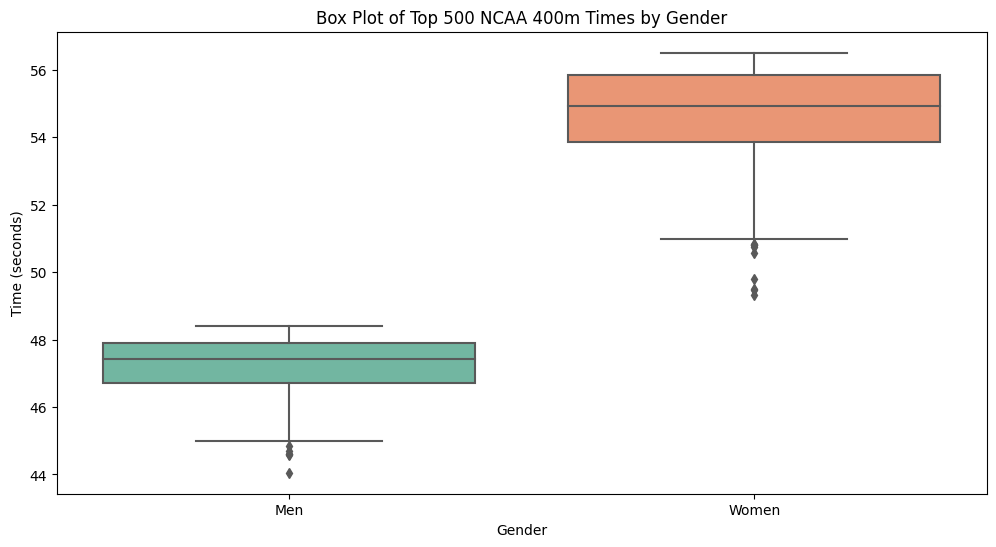

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


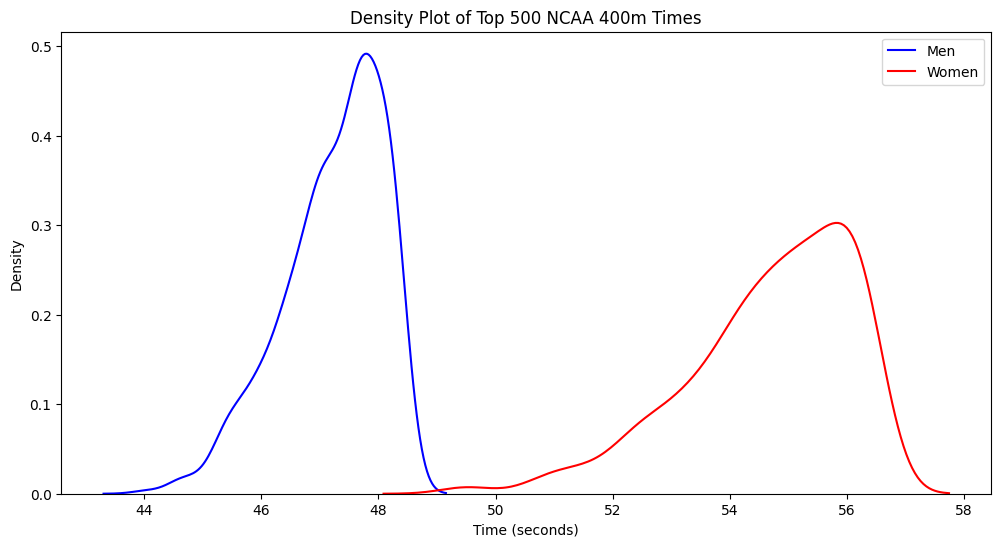

In [3]:
# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(men['Time (clean)'], kde=True, color='blue', label='Men', bins=30)
sns.histplot(women['Time (clean)'], kde=True, color='red', label='Women', bins=30)
plt.legend()
plt.title('Histogram of Top 500 NCAA 400m Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.concat([men[['Time (clean)']].assign(Gender='Men'),
                            women[['Time (clean)']].assign(Gender='Women')]), 
            x='Gender', y='Time (clean)', palette='Set2')
plt.title('Box Plot of Top 500 NCAA 400m Times by Gender')
plt.xlabel('Gender')
plt.ylabel('Time (seconds)')
plt.show()

# Density Plots
plt.figure(figsize=(12, 6))
sns.kdeplot(men['Time (clean)'], label='Men', color='blue')
sns.kdeplot(women['Time (clean)'], label='Women', color='red')
plt.legend()
plt.title('Density Plot of Top 500 NCAA 400m Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.show()

In [4]:
# Clean and prepare data
men['Year'] = men['Year'].str.extract('([A-Z]+)', expand=False)  # Extract class year

# Group by class and calculate the average time and count
stats_by_class_men = men.groupby('Year')['Time (clean)'].agg(['mean', 'count']).reset_index()

# Rename columns for clarity
stats_by_class_men.columns = ['Class', 'Average Time (seconds)', 'Count of Men']

print(stats_by_class_men)

  Class  Average Time (seconds)  Count of Men
0    FR               47.443962           106
1    JR               47.236400           125
2    SO               47.321220           123
3    SR               47.001507           146


In [5]:
# Clean and prepare data
women['Year'] = women['Year'].str.extract('([A-Z]+)', expand=False)  # Extract class year

# Group by class and calculate the average time and count
stats_by_class_women = women.groupby('Year')['Time (clean)'].agg(['mean', 'count']).reset_index()

# Rename columns for clarity
stats_by_class_women.columns = ['Class', 'Average Time (seconds)', 'Count of Women']

print(stats_by_class_women)

  Class  Average Time (seconds)  Count of Women
0    FR               54.871165             103
1    JR               54.661307             153
2    SO               54.649406             101
3    SR               54.578881             143


In [6]:
# Count the number of athletes per school
men_counts = men['Team'].value_counts().reset_index()
men_counts.columns = ['School', 'Men']

women_counts = women['Team'].value_counts().reset_index()
women_counts.columns = ['School', 'Women']

# Merge the results into a single DataFrame
combined_counts = pd.merge(men_counts, women_counts, on='School', how='outer').fillna(0)

# Convert counts to integer
combined_counts['Men'] = combined_counts['Men'].astype(int)
combined_counts['Women'] = combined_counts['Women'].astype(int)

# Print the resulting DataFrame
print(combined_counts)

                School  Men  Women
0    Abilene Christian    1      3
1            Air Force    1      2
2                Akron    3      3
3              Alabama    5      1
4        Alabama State    3      3
..                 ...  ...    ...
272          Wisconsin    2      0
273            Wofford    2      1
274            Wyoming    1      0
275               Yale    1      3
276     Youngstown St.    1      1

[277 rows x 3 columns]


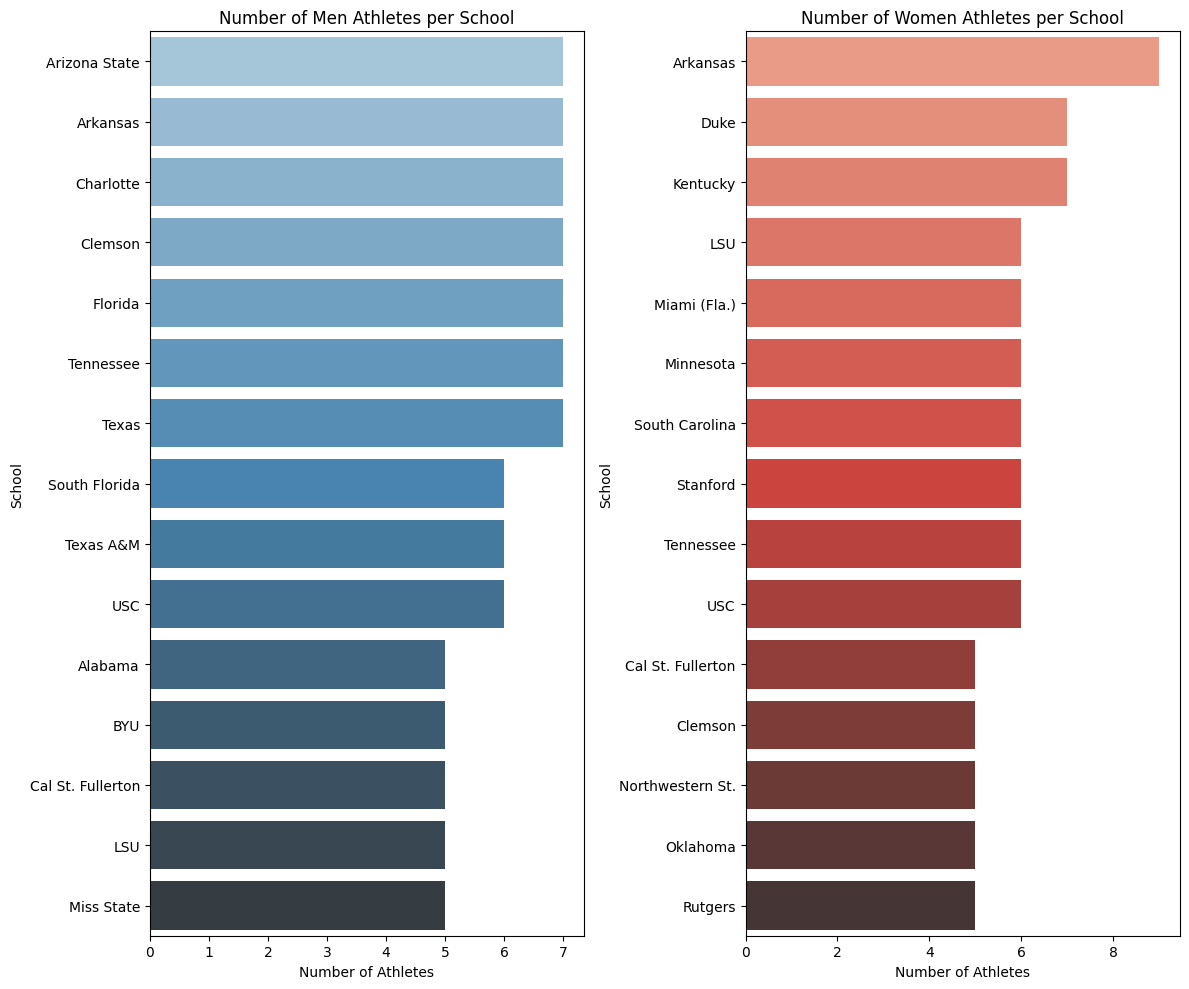

In [7]:
# Get top 15 schools for men and women
top_men = combined_counts.nlargest(15, 'Men')
top_women = combined_counts.nlargest(15, 'Women')

# Plotting
plt.figure(figsize=(12, 10))

# Horizontal bar plot for Men
plt.subplot(1, 2, 1)
sns.barplot(data=top_men, y='School', x='Men', palette='Blues_d')
plt.title('Number of Men Athletes per School')
plt.xlabel('Number of Athletes')

# Horizontal bar plot for Women
plt.subplot(1, 2, 2)
sns.barplot(data=top_women, y='School', x='Women', palette='Reds_d')
plt.title('Number of Women Athletes per School')
plt.xlabel('Number of Athletes')

# Rotate y-axis labels for better readability
for ax in plt.gcf().axes:
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

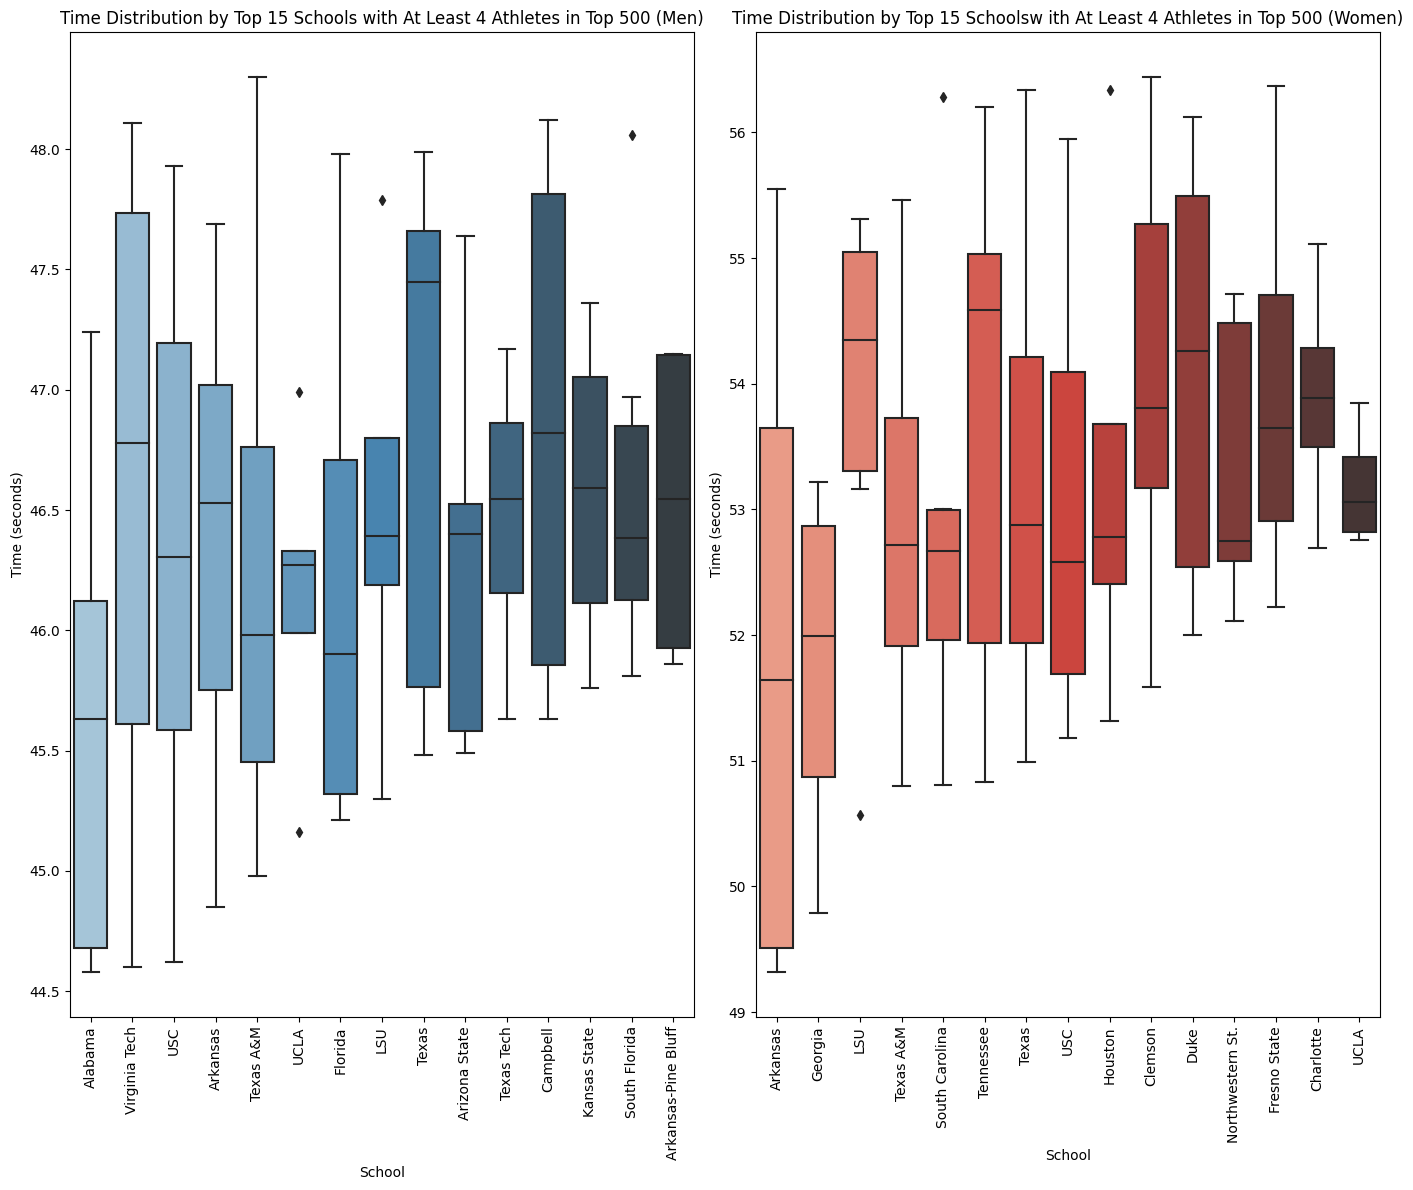

In [8]:
# Count the number of athletes per school
athlete_count_men = men['Team'].value_counts().reset_index()
athlete_count_men.columns = ['School', 'Number of Athletes']

athlete_count_women = women['Team'].value_counts().reset_index()
athlete_count_women.columns = ['School', 'Number of Athletes']

# Filter for schools with at least 4 athletes
schools_with_min_4_men = athlete_count_men[athlete_count_men['Number of Athletes'] >= 4]
schools_with_min_4_women = athlete_count_women[athlete_count_women['Number of Athletes'] >= 4]

# Compute the average time for each school
avg_time_men = men.groupby('Team')['Time (clean)'].mean().reset_index()
avg_time_men.columns = ['School', 'Average Time']

avg_time_women = women.groupby('Team')['Time (clean)'].mean().reset_index()
avg_time_women.columns = ['School', 'Average Time']

# Merge with the athlete count data to filter out schools with fewer than 4 athletes
avg_time_men = avg_time_men.merge(schools_with_min_4_men, on='School')
avg_time_women = avg_time_women.merge(schools_with_min_4_women, on='School')

# Get the top 15 schools based on average time
top_15_men_schools = avg_time_men.nsmallest(15, 'Average Time')
top_15_women_schools = avg_time_women.nsmallest(15, 'Average Time')

# Filter the original data to include only these top 15 schools
filtered_men = men[men['Team'].isin(top_15_men_schools['School'])]
filtered_women = women[women['Team'].isin(top_15_women_schools['School'])]

# Plotting
plt.figure(figsize=(14, 12))

# Distribution plot for Top 15 Men Schools
plt.subplot(1, 2, 1)
sns.boxplot(data=filtered_men, x='Team', y='Time (clean)', palette='Blues_d')
plt.title('Time Distribution by Top 15 Schools with At Least 4 Athletes in Top 500 (Men)')
plt.xlabel('School')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=90)

# Distribution plot for Top 15 Women Schools
plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_women, x='Team', y='Time (clean)', palette='Reds_d')
plt.title('Time Distribution by Top 15 Schoolsw ith At Least 4 Athletes in Top 500 (Women)')
plt.xlabel('School')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [9]:
# Summary statistics for men
summary_men = filtered_men.groupby('Team')['Time (clean)'].describe()
print("Men's Summary Statistics:")
print(summary_men)

# Summary statistics for women
summary_women = filtered_women.groupby('Team')['Time (clean)'].describe()
print("Women's Summary Statistics:")
print(summary_women)


Men's Summary Statistics:
                     count       mean       std    min      25%     50%  \
Team                                                                      
Alabama                5.0  45.650000  1.099454  44.58  44.6800  45.630   
Arizona State          7.0  46.248571  0.772796  45.49  45.5800  46.400   
Arkansas               7.0  46.372857  0.992484  44.85  45.7500  46.530   
Arkansas-Pine Bluff    4.0  46.525000  0.716868  45.86  45.9275  46.545   
Campbell               4.0  46.847500  1.249970  45.63  45.8550  46.820   
Florida                7.0  46.164286  1.028751  45.21  45.3200  45.900   
Kansas State           4.0  46.575000  0.716496  45.76  46.1125  46.590   
LSU                    5.0  46.494000  0.908587  45.30  46.1900  46.390   
South Florida          6.0  46.613333  0.810300  45.81  46.1250  46.385   
Texas                  7.0  46.824286  1.102903  45.48  45.7650  47.450   
Texas A&M              6.0  46.256667  1.212809  44.98  45.4525  45.980   

## Share
Analysis of Men's Summary Statistics:
* **Best Performing Schools (Lowest median time):**
    * Alabama: 45.630
    * Florida: 45.900
    * Texas A&M: 45.98
* **Top Performers:**
    * Alabama: 44.58
    * Virginia Tech: 44.60
    * USC: 44.62

Analysis of Women's Summary Statistics:
* **Best Performing Schools (Lowest median time):**
    * Arkansas: 51.640
    * Georgia: 51.990
    * USC: 52.58
* **Top Performers:**
    * Arkansas: 49.32
    * Georgia: 49.79
    * LSU: 50.57


## Insights
* Women’s times have more variability (1.42 seconds) compared to men’s (0.86 seconds), indicating more spread in women’s performance.  

**Mens 400**  
* Seniors have the lowest average time (47.00 seconds), indicating they are the fastest group. This suggests that, on average, seniors are the strongest performers in the men's 400m.
* Juniors have the second-lowest average time (47.24 seconds), followed by sophomores (47.32 seconds) and freshmen (47.44 seconds).
* The number of athletes is highest among seniors (146) and juniors (125), which could contribute to their lower average times due to more competition within the group.  

**Womens 400**  
* Seniors have the lowest average time (54.58 seconds), indicating they are the fastest group among women as well.
* Sophomores (54.65 seconds) have the second lowest average, followed by juniors (54.66 seconds) and freshmen (54.87 seconds).
* The number of athletes is highest among juniors (153) and seniors (143), which could also be a factor because of their experience.